In [4]:
import numpy as np
import matplotlib.pyplot as plt
from evalf import evalf
from trapezoidalMatrixFree import trapezoidalMatrixFree
from trapezoidal import rk_integrator, expand_params

%load_ext autoreload
%autoreload 2

def better_imshow(row_vals, col_vals, data, ax=None):
    #row_vals and col_vals are the data that was swept over
    assert len(row_vals) == data.shape[0], 'length of row_vals does not match shape of data'
    assert len(col_vals) == data.shape[1], 'length of col_vals does not match shape of data'
    if ax == None:
        plt.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
    else:
        ax.imshow(data, origin='lower', extent=[col_vals[0], col_vals[-1], row_vals[0], row_vals[-1]], aspect='auto')
        
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, L_list, n_t.T, shading='nearest')
    # plt.contourf(tlist, L_list, n_t.T)
    plt.ylabel('L (particle size)')
    plt.xlabel('time')
    plt.colorbar()
    plt.show()

    # plt.plot(tlist, x[:,0]) 
    # plt.title('supersaturation')
    # plt.xlabel('t')
    # plt.show()

    # plt.plot(tlist, x[:,1]) 
    # plt.title('volume')
    # plt.xlabel('t')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# start by computing a reference with RK4

t_final = 20
L_list = np.linspace(0,1e-2,50)

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e-3, #growth rate constant m/s
     'g' : 1, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :2, #power constant for nucleation
     'weno': False  # use weno or not for differentiation w.r.t. L
     }

p_expand = expand_params(p)

xlist = []
for dt in np.logspace(-1, -3, 10):
    # dt = 1e-1
    tlist = np.arange(0, t_final, dt)
    x_t = rk_integrator(x0, tlist, p)
    xlist.append(x_t[-1,:])
    # plot_results(x_t, L_list, tlist)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/557 [00:00<?, ?it/s]

  0%|          | 0/929 [00:00<?, ?it/s]

  0%|          | 0/1549 [00:00<?, ?it/s]

  0%|          | 0/2584 [00:00<?, ?it/s]

  0%|          | 0/4309 [00:00<?, ?it/s]

  0%|          | 0/7188 [00:00<?, ?it/s]

  0%|          | 0/11990 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

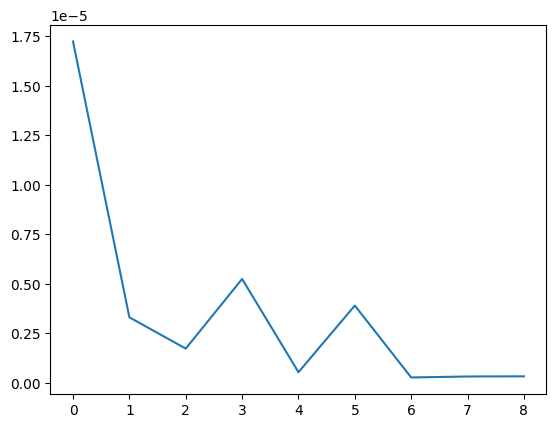

In [16]:
errors = []
for i in range(len(xlist)-1):
    errors.append(np.linalg.norm((xlist[i+1]-xlist[i]))/np.linalg.norm(xlist[i+1]))
    
plt.plot(errors)

array([3.80281715e-03, 9.99998000e-01, 1.62422087e+06, 1.61987689e+06,
       1.61190745e+06, 1.60074326e+06, 1.58610030e+06, 1.56811217e+06,
       1.54792254e+06, 1.52610913e+06, 1.50179543e+06, 1.47444896e+06,
       1.44536221e+06, 1.41601938e+06, 1.38586396e+06, 1.35320708e+06,
       1.31804433e+06, 1.28247123e+06, 1.24795306e+06, 1.21332335e+06,
       1.17634279e+06, 1.13675351e+06, 1.09685149e+06, 1.05887593e+06,
       1.02241505e+06, 9.84835144e+05, 9.44159161e+05, 9.01227789e+05,
       8.58972429e+05, 8.19672119e+05, 7.82878132e+05, 7.45798530e+05,
       7.05619293e+05, 6.61732168e+05, 6.16193137e+05, 5.72277941e+05,
       5.32332878e+05, 4.96369860e+05, 4.62123794e+05, 4.26318890e+05,
       3.86272639e+05, 3.41054583e+05, 2.91707398e+05, 2.40822068e+05,
       1.91452606e+05, 1.46579693e+05, 1.07887286e+05, 7.67399067e+04,
       5.22215034e+04, 3.49568433e+04, 2.16076118e+04, 1.43846805e+04])